In [1]:
import csv
import pandas
import sys
sys.path
sys.path.append('c:/users/jafar/appdata/local/programs/python/python36/lib/site-packages')
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
import numpy as np

In [2]:
info_csv_Loc = pandas.read_csv('New York.csv', sep=';', na_values="(missing)")
info_csv_Loc.shape 
info_csv_Loc.columns
info_csv_Loc.head()# Preview the first 5 lines of the loaded data 
print(info_csv_Loc['user id'])

##df=info_csv_Loc
##df.to_excel('data1.xlsx')
##df.to_json('data1-columns.json')

csvFile_Loc = open('tweets_NY.csv', 'w')
csvWriter = csv.writer(csvFile_Loc, delimiter=';')
csvWriter.writerow(["cleaned tweet"])

0                  1549351004
1                    62478716
2                    19417492
3                    19564939
4                    18894514
                 ...         
225576             3523773497
225577              425457162
225578               70760188
225579    1210082325536620545
225580             4485522145
Name: user id, Length: 225581, dtype: int64


15

In [3]:
all_tweets=[]
for i in range(info_csv_Loc.shape[0]):
    csvFile_Loc = open('tweets_NY.csv', 'a',encoding="utf-8")
    csvWriter = csv.writer(csvFile_Loc, delimiter=';' )
    csvWriter.writerow( [info_csv_Loc['cleaned tweet'][i]])
    xxx = info_csv_Loc['cleaned tweet'][i]
    if type(xxx)==float:
        xxx='bbbbb'
    all_tweets.append(xxx)

In [4]:
type(xxx)
xxx

' omg similar cases india past days well said mary indeed csa material'

In [5]:
info_csv_Loc = pandas.read_csv('tweets_NY.csv', sep=';', na_values="(missing)")
df=info_csv_Loc
df.to_excel('data1.xlsx')
df.to_json('data1-columns.json')   

In [6]:
#***********************************************************
'''
all_tweets=[]
for i in range(info_csv_Loc.shape[0]):
    xxx = info_csv_Loc['cleaned tweet'][i]
    all_tweets.append(xxx)
'''

"\nall_tweets=[]\nfor i in range(info_csv_Loc.shape[0]):\n    xxx = info_csv_Loc['cleaned tweet'][i]\n    all_tweets.append(xxx)\n"

In [7]:
#***********************************************************
'''
##Text Cleanup - Address Case Issues
##Create List of Lower Case Words from Tweets
# Split the words from one tweet into unique elements
all_tweets_no_urls[0].lower().split()
#set(all_tweets_no_urls)
'''

'\n##Text Cleanup - Address Case Issues\n##Create List of Lower Case Words from Tweets\n# Split the words from one tweet into unique elements\nall_tweets_no_urls[0].lower().split()\n#set(all_tweets_no_urls)\n'

In [8]:
all_tweets_no_urls=iter(all_tweets)

In [9]:
# Create a list of lists containing lowercase words for each tweet
words_in_tweet = [tweet.split() for tweet in all_tweets_no_urls]

In [10]:
print(words_in_tweet[:2]) # two lists related to two persons
print('3+'*20)

##Calculate and Plot Word Frequency
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))
# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)
print(counts_no_urls.most_common(1001))

[['would', 'describe', 'boston/cambridge', 'suburb', 'hipsters', 'gentrifiers', 'brooklyn', 'moved', 'omg', 'ivenever', 'theyalllookalike', 'boston', 'cambridge', 'howsway'], ['real', 'insight', 'comes', 'plowing', 'trenches', 'prior', 'founding', 'startup', 'solves', 'plowing', 'value', 'identify', 'issues', 'first', 'hand', 'huge', 'solving', 'keeping', 'focus']]
3+3+3+3+3+3+3+3+3+3+3+3+3+3+3+3+3+3+3+3+
[('like', 12821), ('amp', 11510), ('new', 11140), ('one', 10710), ('people', 9796), ('get', 9599), ('time', 7943), ('know', 7428), ('good', 7313), ('us', 6866), ('love', 6607), ('year', 6449), ('see', 6290), ('would', 6231), ('think', 5722), ('need', 5704), ('great', 5607), ('make', 5419), ('work', 5381), ('via', 5277), ('day', 5164), ('want', 5125), ('thank', 4979), ('right', 4924), ('go', 4850), ('trump', 4742), ('today', 4714), ('really', 4647), ('way', 4642), ('much', 4528), ("i'm", 4446), ('even', 4401), ('back', 4348), ('going', 4343), ('also', 4203), ('first', 4189), ('happy', 

In [11]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(1001),
                             columns=['words', 'count'])

In [13]:
csvFile_Loc = open('MostFrequentWordsInTweets.csv', 'w')
csvWriter = csv.writer(csvFile_Loc, delimiter=';')
csvWriter.writerow(["words","count"])

for i in range(1001):
    csvFile_Loc = open('MostFrequentWordsInTweets.csv', 'a',encoding="utf-8")
    csvWriter = csv.writer(csvFile_Loc, delimiter=';' )
    csvWriter.writerow( [clean_tweets_no_urls['words'][i],
                         clean_tweets_no_urls['count'][i]])

In [13]:
clean_tweets_no_urls.to_csv('MostFrequent.csv')

    words  count
0    like  12821
1     amp  11510
2     new  11140
3     one  10710
4  people   9796
5+5+5+5+5+5+5+5+5+5+5+5+5+5+5+5+5+5+5+5+


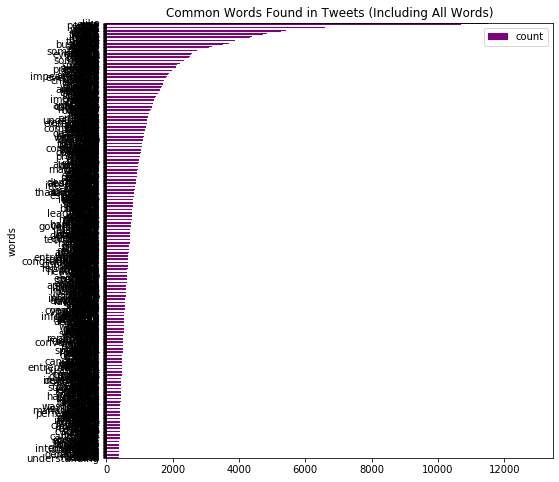

In [14]:
clean_tweets_no_urls.to_excel('data6.xlsx')
print(clean_tweets_no_urls.head())
print('5+'*20)

fig, ax = plt.subplots(figsize=(8, 8))
# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")
ax.set_title("Common Words Found in Tweets (Including All Words)")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jafar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['would', 'describe', 'boston/cambridge', 'suburb', 'hipsters', 'gentrifiers', 'brooklyn', 'moved', 'omg', 'ivenever', 'theyalllookalike', 'boston', 'cambridge', 'howsway']
['would', 'describe', 'boston/cambridge', 'suburb', 'hipsters', 'gentrifiers', 'brooklyn', 'moved', 'omg', 'ivenever', 'theyalllookalike', 'boston', 'cambridge', 'howsway']
[('like', 12821), ('amp', 11510), ('new', 11140), ('one', 10710), ('people', 9796), ('get', 9599), ('time', 7943), ('know', 7428), ('good', 7313), ('us', 6866), ('love', 6607), ('year', 6449), ('see', 6290), ('would', 6231), ('think', 5722), ('need', 5704), ('great', 5607), ('make', 5419), ('work', 5381), ('via', 5277), ('day', 5164), ('want', 5125), ('thank', 4979), ('right', 4924), ('go', 4850), ('trump', 4742), ('today', 4714), ('really', 4647), ('way', 4642), ('much', 4528), ("i'm", 4446), ('even', 4401), ('back', 4348), ('going', 4343), ('also', 4203), ('first', 4189), ('happy', 4156), ('best', 4103), ('still', 4095), ('life', 4070), ('thank

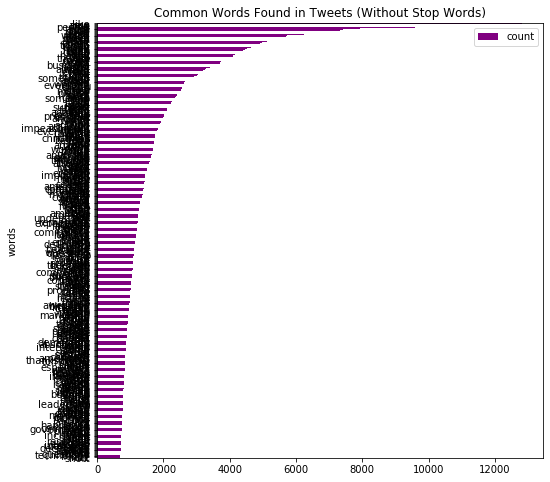

In [15]:
##Remove Stopwords With nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# View a few words from the set
list(stop_words)[0:10]

print(words_in_tweet[0])
# Remove stop words from each tweet list of words
tweets_nsw = [  [word for word in tweet_words if not word in stop_words]
                for tweet_words in words_in_tweet   ]
print(tweets_nsw[0])

##flattening the list and create a counter to return the most commonly used words and the number of times that they are used.
all_words_nsw = list(itertools.chain(*tweets_nsw))
counts_nsw = collections.Counter(all_words_nsw)
print(counts_nsw.most_common(500))

clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(500),columns=['words', 'count'])
clean_tweets_nsw.to_excel('data7.xlsx')

fig, ax = plt.subplots(figsize=(8, 8))
# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")
ax.set_title("Common Words Found in Tweets (Without Stop Words)")
plt.show()

['would', 'describe', 'boston/cambridge', 'suburb', 'hipsters', 'gentrifiers', 'brooklyn', 'moved', 'omg', 'ivenever', 'theyalllookalike', 'boston', 'cambridge', 'howsway']
['would', 'describe', 'boston/cambridge', 'suburb', 'hipsters', 'gentrifiers', 'brooklyn', 'moved', 'omg', 'ivenever', 'theyalllookalike', 'boston', 'cambridge', 'howsway']
[('like', 12821), ('amp', 11510), ('new', 11140), ('one', 10710), ('people', 9796), ('get', 9599), ('time', 7943), ('know', 7428), ('good', 7313), ('us', 6866), ('love', 6607), ('year', 6449), ('see', 6290), ('would', 6231), ('think', 5722), ('need', 5704), ('great', 5607), ('make', 5419), ('work', 5381), ('via', 5277), ('day', 5164), ('want', 5125), ('thank', 4979), ('right', 4924), ('go', 4850), ('trump', 4742), ('today', 4714), ('really', 4647), ('way', 4642), ('much', 4528), ("i'm", 4446), ('even', 4401), ('back', 4348), ('going', 4343), ('also', 4203), ('first', 4189), ('happy', 4156), ('best', 4103), ('still', 4095), ('life', 4070), ('thank

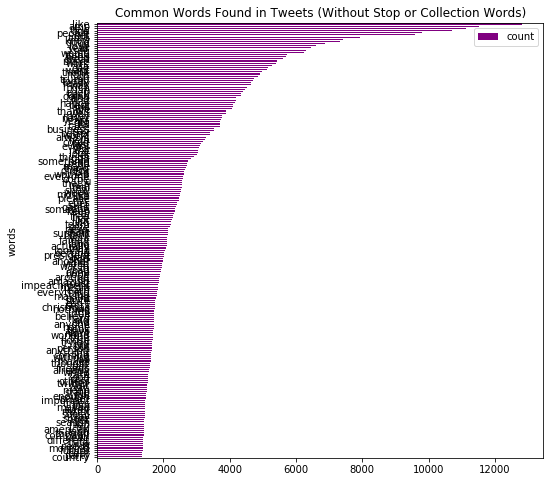

In [16]:
##Remove Collection Words :In additional to removing stopwords, it is common to also remove collection words. Collection words are the words that you used to query your data from Twitter.
collection_words = ['climatechange', 'climate', 'change']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]
print(tweets_nsw[0])
print(tweets_nsw_nc[0])

##Calculate and Plot Word Frequency of Clean Tweets
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))
# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)
print(counts_nsw_nc.most_common(200))
print('number od words:', len(counts_nsw_nc))

clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(200),columns=['words', 'count'])
clean_tweets_ncw.to_excel('data8.xlsx')

clean_tweets_ncw.head()
fig, ax = plt.subplots(figsize=(8, 8))
# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")
ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")
plt.show()